In [157]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import TextVectorization
from PIL import Image


import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [158]:
dataset = keras.preprocessing.image_dataset_from_directory('C:/Users/mhalama/Sieci/data_set_banan_or_apple', batch_size=12, image_size=(200, 200),  class_names=None,)

Found 12 files belonging to 2 classes.


TypeError: 'BatchDataset' object is not callable

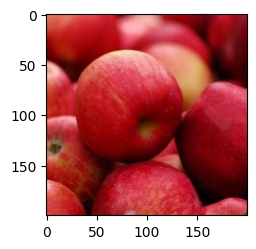

In [ ]:
plt.figure(figsize=(12,12))
ax = plt.subplot(4, 4, 1)
plt.imshow(images[2].numpy().astype("uint8"))


Sprawdzenie rozmiarów plików (obrazków) w datasecie 

Sposób I


In [ ]:
for image_batch, labels_batch in dataset:
  print(image_batch.shape)
  print(labels_batch.shape)

(12, 200, 200, 3)
(12,)


Sposób II

In [ ]:
for data, labels in dataset:
   print(data.shape) 
   print(data.dtype) 
   print(labels.shape)  
   print(labels.dtype) 
   

(12, 200, 200, 3)
<dtype: 'float32'>
(12,)
<dtype: 'int32'>


In [ ]:
class_names = dataset.class_names
print(class_names)

['appel', 'bannana']


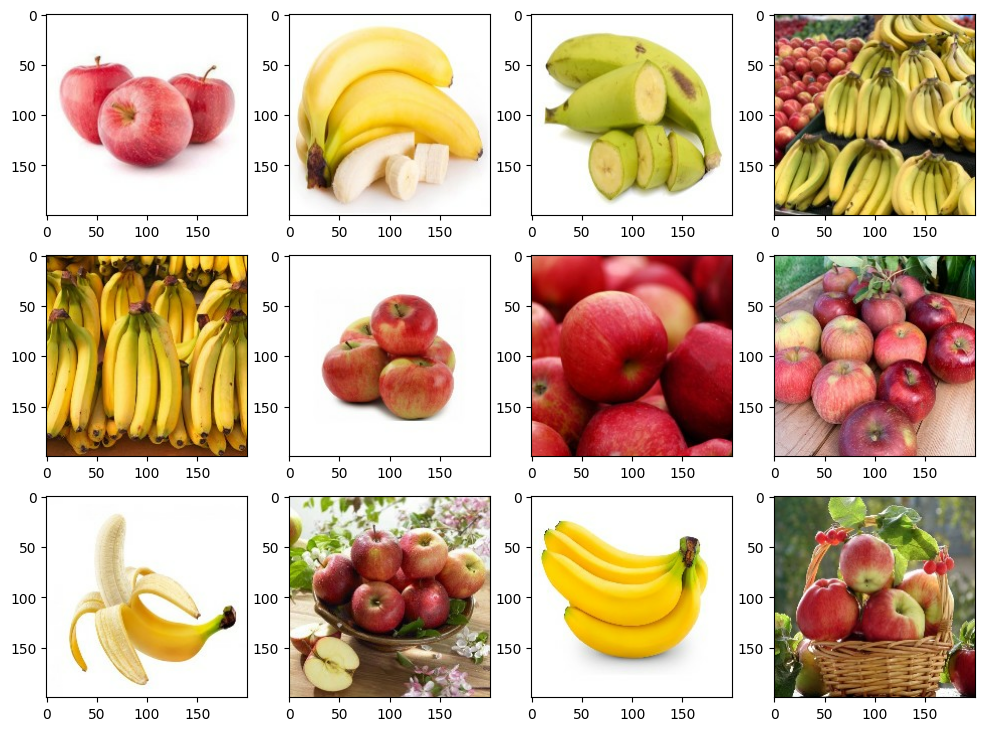

In [ ]:

plt.figure(figsize=(12,12))
for images, labels in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))


(12, 200, 200, 3)
(12,)


In [ ]:
x_train = x_train.astype("float32") / 255


TypeError: 'module' object is not callable

Tworzenie modelu

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(200, 200, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='softmax'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 50, 50, 64)       

In [ ]:
epochs=3
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/3
1/1 [==============================] - 1s 1s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6870 - val_accuracy: 0.5000
Epoch 2/3
1/1 [==============================] - 0s 225ms/step - loss: 0.6870 - accuracy: 0.5000 - val_loss: 0.6704 - val_accuracy: 0.5833
Epoch 3/3
1/1 [==============================] - 0s 223ms/step - loss: 0.6704 - accuracy: 0.5833 - val_loss: 0.6380 - val_accuracy: 0.8333


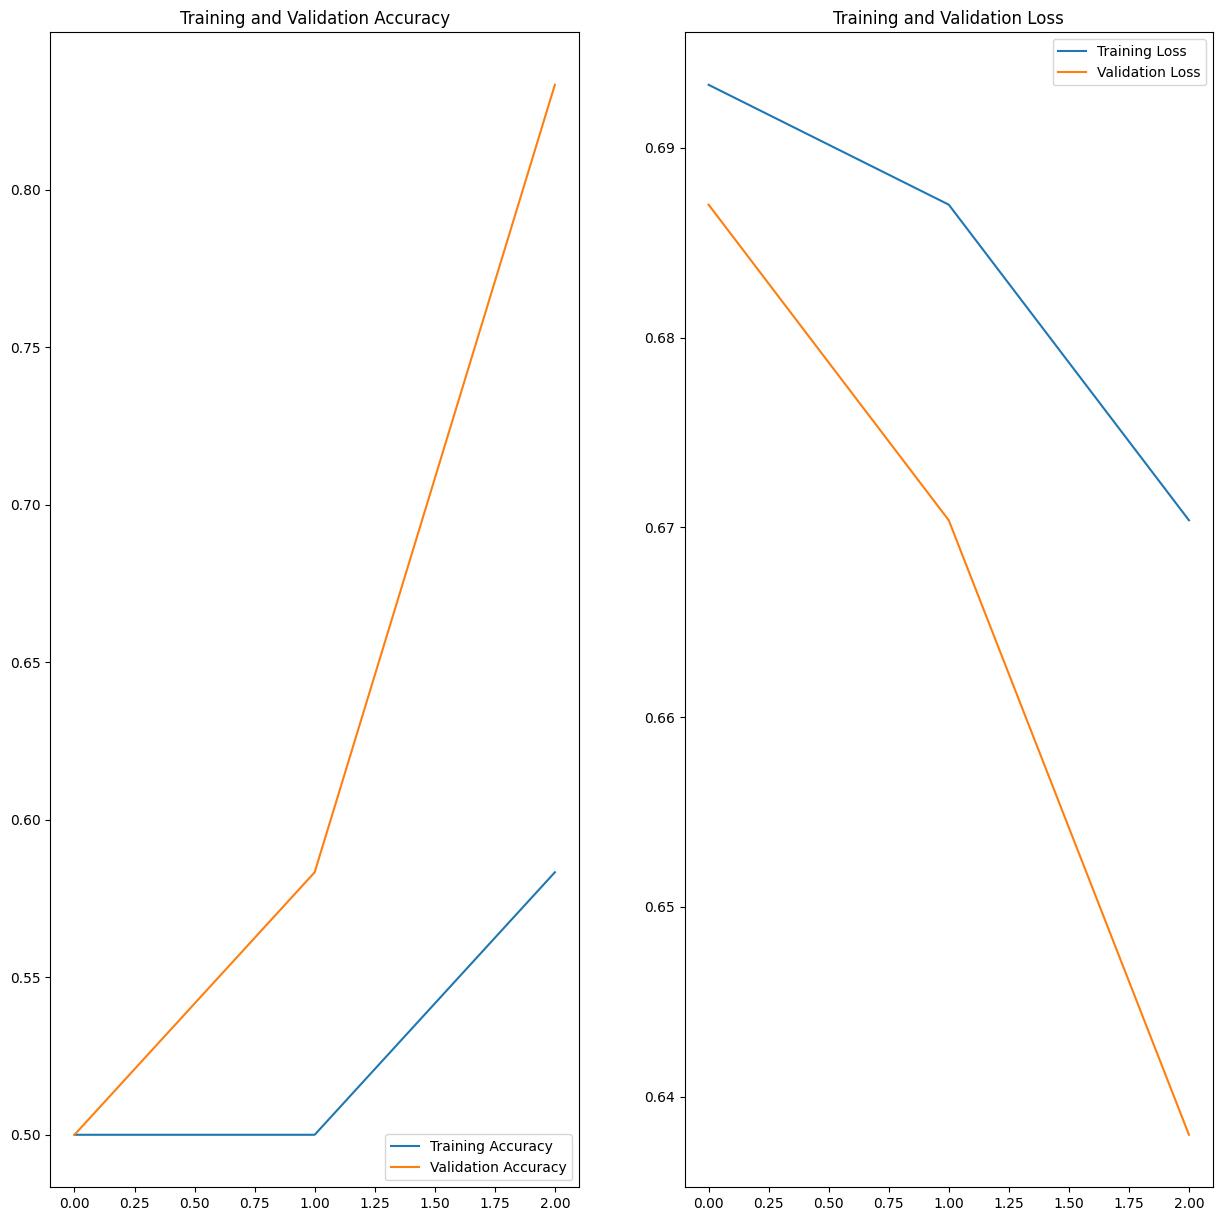

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()